# WordNet Dataset experiment #
What do I wish to achieve with this experiment(s)?

### Correct vs Incorrect gradient behaviour expectation
The correct gradient adds an additional factor to the attr./rep. forces. I expect this to speed up convergence. 

The attractive term (1st term) is a sparse term (most values in summation are 0), and thus I expect less of an effect on attraction (unless perpelxity is increased). 

The repulsive term (2nd term) will be more strongly affected. As points go apart $q^{H}_{ij}$ goes down (to 0) but, $d^{H}_{ij}$, the extra term will increase (exponentially?)

So the expectation is that points will repel more strongly, points will be repelled faster and more strongly.


### Early exaggeration
At the beginning we scale up the high dim. prob.'s so the attractive term dominates more. This is so similar points already start clustering together before being separated by the repulsive force. 



### WordNet specific experiment animo
1. WordNet is supposedly a hierarchical (hyperbolic) dataset
    - Is this a property that we can "obviously" observe from the embeddings?
    - We expect the WordNet visualizations to display obivous hyperbolic/hierarchical structure
2. Is there a noteworthy difference in speed/embedding quality for the incorrect vs correct gradient?

3. Enable acceleration


### WordNet dataset experiment notes
1. My current setup can't handle > 0.1 numpoints well. It takes a long time (So test stuff with less data)

In [1]:
import os
import traceback

from hyperbolicTSNE import Datasets
from hyperbolicTSNE.visualization import plot_poincare, animate
from hyperbolicTSNE import load_data, Datasets, SequentialOptimizer, initialization, HyperbolicTSNE
from hyperbolicTSNE.cost_functions_ import CoSNE, HyperbolicKL, GlobalHSNE
from hyperbolicTSNE.util import find_last_embedding, opt_config, initialize_logger, write_data, store_visuals

Please note that `empty_sequence` uses the KL divergence with Barnes-Hut approximation (angle=0.5) by default.


In [2]:
data_home = "datasets"
log_path = "temp/poincare/"  # path for saving embedding snapshots

In [3]:
seed = 42

# Different experiment values
# num_points = [0.25, 0.5, -1]                     # -1 means all the data
# perplexities = [10, 30, 50, 80, 100, 150]

# Parameters specific to experiments
# MNIST -> (70000, 784)
# C_ELEGANS -> (89701, 20222)
datasets = [Datasets.C_ELEGANS, Datasets.PLANARIA] 
num_points = [0.5]
perplexities = [50]
correct_gradients = [False, True]                # NOTE: Recompile with correct flag (GRAD_FIX flag)
exact = False                                    # Exact computation or BH estimation of gradient
pca_components = 50                              # Whether to use pca initialization of high dim. data or not
grad_scale_fix = True                            # Whether we multiply the gradient by the inverse metric tensor of hyperbolic space or not
                                                 # Note that the correct hyperoblic gradient has an inverse metric tensor factor
learning_rates_factors = [1000, 10000]

# General parameters to be set for all experiments
exaggeration_factor = 12
ex_iterations = 250
main_iterations = 1000

# Parameters to be set regarding saving of data
# TODO: Automate cost identification for saving purposes. Right now its done manually
data_header = ['dataset', 'data_size', 
                'data_dim', 'pca_init', 
                'perplexity', 'pca_components',
                'cost_function_value', 'cost_function', 
                'runtime', 'total_iterations', 
                'exact', 'correct_gradient', 'grad_scale_fix', 'lr_factor']

In [4]:
# Setting up the cost function
# cf = CoSNE
# lambda_1 = 20
# lambda_2 = 0.1

# def CoSNE_params(x_norm, l1, l2, n_samples):
#     return {
#         "x_norm" : x_norm,
#         "lambda_1" : l1,
#         "lambda_2" : l2,
#         "n_samples" : n_samples
#     }

# print(cf.class_str())
# cf = GlobalHSNE
# lbda = 0.1
# def GlobalHSNE_params(P_hat, lbda, n_samples):
#     return {
#         "P_hat": P_hat,
#         "lbda": lbda,
#         "n_samples": n_samples,
#     }
cf = HyperbolicKL


Experiment:  Datasets.C_ELEGANS num_points:  0.5 perp:  50 correct gradient:  False
Please note that `empty_sequence` uses the KL divergence with Barnes-Hut approximation (angle=0.5) by default.
config: {'cf': <class 'hyperbolicTSNE.cost_functions_.HyperbolicKL'>, 'learning_rate_ex': 3.7375, 'learning_rate_main': 3.7375, 'exaggeration': 12, 'exaggeration_its': 250, 'gradientDescent_its': 1000, 'vanilla': False, 'momentum_ex': 0.5, 'momentum': 0.8, 'exact': False, 'area_split': False, 'n_iter_check': 10, 'size_tol': 0.999, 'grad_scale_fix': False, 'grad_fix': True}
{'grad_fix': False}
[HyperbolicTSNE] Received iterable as input. It should have len=2 and contain (D=None, V=None)
[hd_mat] Warning: There is nothing to do with given parameters. Returning given D and V
Grad Fix:  True
Running Gradient Descent, Verbosity: True
[gradient_descent] Warning: because of logging, the cf will be computed at every iteration


Gradient Descent error: 108.03092 grad_norm: 2.60169e-01: 100%|██████████| 250/250 [02:03<00:00,  2.02it/s]


Running Gradient Descent, Verbosity: True
[gradient_descent] Warning: because of logging, the cf will be computed at every iteration


Gradient Descent error: 4.94285 grad_norm: 1.10986e+00:  18%|█▊        | 180/1000 [01:32<07:03,  1.94it/s]


4
Animation being saved to: results/C_ELEGANS/exact:False_correctgrad:False_scalefix:True_points:0.5_pca:50_perp:50_cf:HyperbolicKL_lrfactor:1000.gif


Animating:   0%|          | 0/87 [00:00<?, ?it/s]/Users/haoranxia/Thesis-Delft/hyperbolic-tsne/hyperbolicTSNE/visualization.py:322: UserWarning: You passed in an explicit save_count=50 which is being ignored in favor of frames=87.
  anim = FuncAnimation(fig, update, frames=len(scatter_data), interval=50, blit=True, save_count=50)
Animating:   1%|          | 1/87 [00:00<00:17,  4.80it/s]MovieWriter ffmpeg unavailable; using Pillow instead.
Animating: : 90it [00:36,  2.49it/s]                      



Experiment:  Datasets.C_ELEGANS num_points:  0.5 perp:  50 correct gradient:  False
Please note that `empty_sequence` uses the KL divergence with Barnes-Hut approximation (angle=0.5) by default.
config: {'cf': <class 'hyperbolicTSNE.cost_functions_.HyperbolicKL'>, 'learning_rate_ex': 0.37375, 'learning_rate_main': 0.37375, 'exaggeration': 12, 'exaggeration_its': 250, 'gradientDescent_its': 1000, 'vanilla': False, 'momentum_ex': 0.5, 'momentum': 0.8, 'exact': False, 'area_split': False, 'n_iter_check': 10, 'size_tol': 0.999, 'grad_scale_fix': False, 'grad_fix': True}
{'grad_fix': False}
[HyperbolicTSNE] Received iterable as input. It should have len=2 and contain (D=None, V=None)
[hd_mat] Warning: There is nothing to do with given parameters. Returning given D and V
Grad Fix:  True
Running Gradient Descent, Verbosity: True
[gradient_descent] Warning: because of logging, the cf will be computed at every iteration


Gradient Descent error: 108.59197 grad_norm: 2.62197e-01: 100%|██████████| 250/250 [02:03<00:00,  2.03it/s]


Running Gradient Descent, Verbosity: True
[gradient_descent] Warning: because of logging, the cf will be computed at every iteration


Gradient Descent error: 5.15734 grad_norm: 5.28416e-02: 100%|██████████| 1000/1000 [09:13<00:00,  1.81it/s]


Animation being saved to: results/C_ELEGANS/exact:False_correctgrad:False_scalefix:True_points:0.5_pca:50_perp:50_cf:HyperbolicKL_lrfactor:10000.gif


Animating:   0%|          | 0/250 [00:00<?, ?it/s]/Users/haoranxia/Thesis-Delft/hyperbolic-tsne/hyperbolicTSNE/visualization.py:322: UserWarning: You passed in an explicit save_count=50 which is being ignored in favor of frames=250.
  anim = FuncAnimation(fig, update, frames=len(scatter_data), interval=50, blit=True, save_count=50)
Animating:   0%|          | 1/250 [00:00<00:49,  5.08it/s]MovieWriter ffmpeg unavailable; using Pillow instead.
Animating: : 253it [01:39,  2.54it/s]                       



Experiment:  Datasets.C_ELEGANS num_points:  0.5 perp:  50 correct gradient:  True
Please note that `empty_sequence` uses the KL divergence with Barnes-Hut approximation (angle=0.5) by default.
config: {'cf': <class 'hyperbolicTSNE.cost_functions_.HyperbolicKL'>, 'learning_rate_ex': 3.7375, 'learning_rate_main': 3.7375, 'exaggeration': 12, 'exaggeration_its': 250, 'gradientDescent_its': 1000, 'vanilla': False, 'momentum_ex': 0.5, 'momentum': 0.8, 'exact': False, 'area_split': False, 'n_iter_check': 10, 'size_tol': 0.999, 'grad_scale_fix': True, 'grad_fix': True}
{'grad_fix': True}
[HyperbolicTSNE] Received iterable as input. It should have len=2 and contain (D=None, V=None)
[hd_mat] Warning: There is nothing to do with given parameters. Returning given D and V
Grad Fix:  True
Running Gradient Descent, Verbosity: True
[gradient_descent] Warning: because of logging, the cf will be computed at every iteration


Gradient Descent error: 108.60160 grad_norm: 1.07938e-04: 100%|██████████| 250/250 [02:00<00:00,  2.08it/s]


Running Gradient Descent, Verbosity: True
[gradient_descent] Warning: because of logging, the cf will be computed at every iteration


Gradient Descent error: 4.02026 grad_norm: 7.63302e-05:  64%|██████▍   | 640/1000 [07:59<04:29,  1.33it/s]


4
Animation being saved to: results/C_ELEGANS/exact:False_correctgrad:True_scalefix:True_points:0.5_pca:50_perp:50_cf:HyperbolicKL_lrfactor:1000.gif


Animating:   0%|          | 0/179 [00:00<?, ?it/s]/Users/haoranxia/Thesis-Delft/hyperbolic-tsne/hyperbolicTSNE/visualization.py:322: UserWarning: You passed in an explicit save_count=50 which is being ignored in favor of frames=179.
  anim = FuncAnimation(fig, update, frames=len(scatter_data), interval=50, blit=True, save_count=50)
Animating:   1%|          | 1/179 [00:00<00:35,  5.08it/s]MovieWriter ffmpeg unavailable; using Pillow instead.
Animating: : 182it [01:12,  2.50it/s]                       



Experiment:  Datasets.C_ELEGANS num_points:  0.5 perp:  50 correct gradient:  True
Please note that `empty_sequence` uses the KL divergence with Barnes-Hut approximation (angle=0.5) by default.
config: {'cf': <class 'hyperbolicTSNE.cost_functions_.HyperbolicKL'>, 'learning_rate_ex': 0.37375, 'learning_rate_main': 0.37375, 'exaggeration': 12, 'exaggeration_its': 250, 'gradientDescent_its': 1000, 'vanilla': False, 'momentum_ex': 0.5, 'momentum': 0.8, 'exact': False, 'area_split': False, 'n_iter_check': 10, 'size_tol': 0.999, 'grad_scale_fix': True, 'grad_fix': True}
{'grad_fix': True}
[HyperbolicTSNE] Received iterable as input. It should have len=2 and contain (D=None, V=None)
[hd_mat] Warning: There is nothing to do with given parameters. Returning given D and V
Grad Fix:  True
Running Gradient Descent, Verbosity: True
[gradient_descent] Warning: because of logging, the cf will be computed at every iteration


Gradient Descent error: 106.72029 grad_norm: 3.87503e-06: 100%|██████████| 250/250 [02:08<00:00,  1.94it/s]


Running Gradient Descent, Verbosity: True
[gradient_descent] Warning: because of logging, the cf will be computed at every iteration


Gradient Descent error: 6.54537 grad_norm: 1.90646e-05:  31%|███       | 310/1000 [03:05<06:51,  1.67it/s]


2
Animation being saved to: results/C_ELEGANS/exact:False_correctgrad:True_scalefix:True_points:0.5_pca:50_perp:50_cf:HyperbolicKL_lrfactor:10000.gif


Animating:   0%|          | 0/113 [00:00<?, ?it/s]/Users/haoranxia/Thesis-Delft/hyperbolic-tsne/hyperbolicTSNE/visualization.py:322: UserWarning: You passed in an explicit save_count=50 which is being ignored in favor of frames=113.
  anim = FuncAnimation(fig, update, frames=len(scatter_data), interval=50, blit=True, save_count=50)
Animating:   1%|          | 1/113 [00:00<00:22,  5.04it/s]MovieWriter ffmpeg unavailable; using Pillow instead.
Animating: : 116it [00:43,  2.67it/s]                       



Experiment:  Datasets.PLANARIA num_points:  0.5 perp:  50 correct gradient:  False
Please note that `empty_sequence` uses the KL divergence with Barnes-Hut approximation (angle=0.5) by default.
config: {'cf': <class 'hyperbolicTSNE.cost_functions_.HyperbolicKL'>, 'learning_rate_ex': 0.9005, 'learning_rate_main': 0.9005, 'exaggeration': 12, 'exaggeration_its': 250, 'gradientDescent_its': 1000, 'vanilla': False, 'momentum_ex': 0.5, 'momentum': 0.8, 'exact': False, 'area_split': False, 'n_iter_check': 10, 'size_tol': 0.999, 'grad_scale_fix': False, 'grad_fix': True}
{'grad_fix': False}
[HyperbolicTSNE] Received iterable as input. It should have len=2 and contain (D=None, V=None)
[hd_mat] Warning: There is nothing to do with given parameters. Returning given D and V
Grad Fix:  True
Running Gradient Descent, Verbosity: True
[gradient_descent] Warning: because of logging, the cf will be computed at every iteration


Gradient Descent error: 88.59748 grad_norm: 7.82664e-01: 100%|██████████| 250/250 [00:40<00:00,  6.12it/s]


Running Gradient Descent, Verbosity: True
[gradient_descent] Warning: because of logging, the cf will be computed at every iteration


Gradient Descent error: 3.63562 grad_norm: 1.93529e+03:  27%|██▋       | 270/1000 [00:41<01:52,  6.49it/s]


4
Animation being saved to: results/PLANARIA/exact:False_correctgrad:False_scalefix:True_points:0.5_pca:50_perp:50_cf:HyperbolicKL_lrfactor:1000.gif


Animating:   0%|          | 0/105 [00:00<?, ?it/s]/Users/haoranxia/Thesis-Delft/hyperbolic-tsne/hyperbolicTSNE/visualization.py:322: UserWarning: You passed in an explicit save_count=50 which is being ignored in favor of frames=105.
  anim = FuncAnimation(fig, update, frames=len(scatter_data), interval=50, blit=True, save_count=50)
MovieWriter ffmpeg unavailable; using Pillow instead.
Animating: : 108it [00:12,  8.78it/s]                       



Experiment:  Datasets.PLANARIA num_points:  0.5 perp:  50 correct gradient:  False
Please note that `empty_sequence` uses the KL divergence with Barnes-Hut approximation (angle=0.5) by default.
config: {'cf': <class 'hyperbolicTSNE.cost_functions_.HyperbolicKL'>, 'learning_rate_ex': 0.09005, 'learning_rate_main': 0.09005, 'exaggeration': 12, 'exaggeration_its': 250, 'gradientDescent_its': 1000, 'vanilla': False, 'momentum_ex': 0.5, 'momentum': 0.8, 'exact': False, 'area_split': False, 'n_iter_check': 10, 'size_tol': 0.999, 'grad_scale_fix': False, 'grad_fix': True}
{'grad_fix': False}
[HyperbolicTSNE] Received iterable as input. It should have len=2 and contain (D=None, V=None)
[hd_mat] Warning: There is nothing to do with given parameters. Returning given D and V
Grad Fix:  True
Running Gradient Descent, Verbosity: True
[gradient_descent] Warning: because of logging, the cf will be computed at every iteration


Gradient Descent error: 88.87367 grad_norm: 7.82086e-01: 100%|██████████| 250/250 [00:45<00:00,  5.48it/s]


Running Gradient Descent, Verbosity: True
[gradient_descent] Warning: because of logging, the cf will be computed at every iteration


Gradient Descent error: 4.10336 grad_norm: 4.72460e-02: 100%|██████████| 1000/1000 [02:27<00:00,  6.78it/s]


Animation being saved to: results/PLANARIA/exact:False_correctgrad:False_scalefix:True_points:0.5_pca:50_perp:50_cf:HyperbolicKL_lrfactor:10000.gif


Animating:   0%|          | 0/250 [00:00<?, ?it/s]/Users/haoranxia/Thesis-Delft/hyperbolic-tsne/hyperbolicTSNE/visualization.py:322: UserWarning: You passed in an explicit save_count=50 which is being ignored in favor of frames=250.
  anim = FuncAnimation(fig, update, frames=len(scatter_data), interval=50, blit=True, save_count=50)
MovieWriter ffmpeg unavailable; using Pillow instead.
Animating: : 253it [00:28,  8.93it/s]                       



Experiment:  Datasets.PLANARIA num_points:  0.5 perp:  50 correct gradient:  True
Please note that `empty_sequence` uses the KL divergence with Barnes-Hut approximation (angle=0.5) by default.
config: {'cf': <class 'hyperbolicTSNE.cost_functions_.HyperbolicKL'>, 'learning_rate_ex': 0.9005, 'learning_rate_main': 0.9005, 'exaggeration': 12, 'exaggeration_its': 250, 'gradientDescent_its': 1000, 'vanilla': False, 'momentum_ex': 0.5, 'momentum': 0.8, 'exact': False, 'area_split': False, 'n_iter_check': 10, 'size_tol': 0.999, 'grad_scale_fix': True, 'grad_fix': True}
{'grad_fix': True}
[HyperbolicTSNE] Received iterable as input. It should have len=2 and contain (D=None, V=None)
[hd_mat] Warning: There is nothing to do with given parameters. Returning given D and V
Grad Fix:  True
Running Gradient Descent, Verbosity: True
[gradient_descent] Warning: because of logging, the cf will be computed at every iteration


Gradient Descent error: 88.85618 grad_norm: 1.94201e-04: 100%|██████████| 250/250 [00:21<00:00, 11.43it/s]


Running Gradient Descent, Verbosity: True
[gradient_descent] Warning: because of logging, the cf will be computed at every iteration


Gradient Descent error: 2.89291 grad_norm: 1.17713e-04:  73%|███████▎  | 730/1000 [01:53<00:42,  6.42it/s]


4
Animation being saved to: results/PLANARIA/exact:False_correctgrad:True_scalefix:True_points:0.5_pca:50_perp:50_cf:HyperbolicKL_lrfactor:1000.gif


Animating:   0%|          | 0/197 [00:00<?, ?it/s]/Users/haoranxia/Thesis-Delft/hyperbolic-tsne/hyperbolicTSNE/visualization.py:322: UserWarning: You passed in an explicit save_count=50 which is being ignored in favor of frames=197.
  anim = FuncAnimation(fig, update, frames=len(scatter_data), interval=50, blit=True, save_count=50)
MovieWriter ffmpeg unavailable; using Pillow instead.
Animating: : 200it [00:22,  8.77it/s]                       



Experiment:  Datasets.PLANARIA num_points:  0.5 perp:  50 correct gradient:  True
Please note that `empty_sequence` uses the KL divergence with Barnes-Hut approximation (angle=0.5) by default.
config: {'cf': <class 'hyperbolicTSNE.cost_functions_.HyperbolicKL'>, 'learning_rate_ex': 0.09005, 'learning_rate_main': 0.09005, 'exaggeration': 12, 'exaggeration_its': 250, 'gradientDescent_its': 1000, 'vanilla': False, 'momentum_ex': 0.5, 'momentum': 0.8, 'exact': False, 'area_split': False, 'n_iter_check': 10, 'size_tol': 0.999, 'grad_scale_fix': True, 'grad_fix': True}
{'grad_fix': True}
[HyperbolicTSNE] Received iterable as input. It should have len=2 and contain (D=None, V=None)
[hd_mat] Warning: There is nothing to do with given parameters. Returning given D and V
Grad Fix:  True
Running Gradient Descent, Verbosity: True
[gradient_descent] Warning: because of logging, the cf will be computed at every iteration


Gradient Descent error: 87.28665 grad_norm: 7.82995e-06: 100%|██████████| 250/250 [00:21<00:00, 11.53it/s]


Running Gradient Descent, Verbosity: True
[gradient_descent] Warning: because of logging, the cf will be computed at every iteration


Gradient Descent error: 4.91025 grad_norm: 3.91420e-05:  31%|███       | 310/1000 [00:29<01:05, 10.54it/s]


2
Animation being saved to: results/PLANARIA/exact:False_correctgrad:True_scalefix:True_points:0.5_pca:50_perp:50_cf:HyperbolicKL_lrfactor:10000.gif


Animating:   0%|          | 0/113 [00:00<?, ?it/s]/Users/haoranxia/Thesis-Delft/hyperbolic-tsne/hyperbolicTSNE/visualization.py:322: UserWarning: You passed in an explicit save_count=50 which is being ignored in favor of frames=113.
  anim = FuncAnimation(fig, update, frames=len(scatter_data), interval=50, blit=True, save_count=50)
MovieWriter ffmpeg unavailable; using Pillow instead.
Animating: : 116it [00:12,  9.42it/s]                       


' \nDimensions for wordnet data\nx_norm: (41058,) dataX.shape[0]: 41058 X_embedded: (41058, 2)\ngrad1.shape: (82116,) Y.shape: (82116,) x_norm: (41058,)\n'

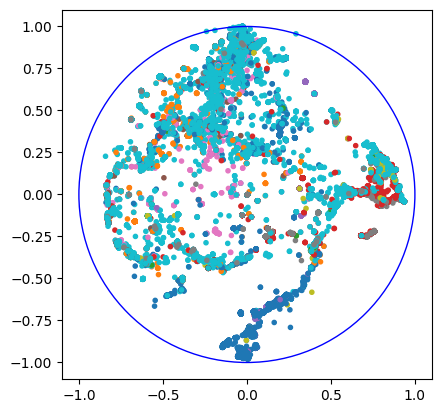

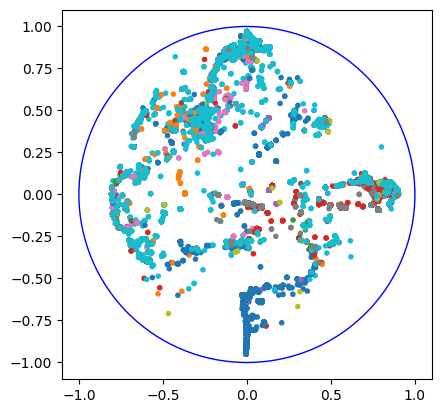

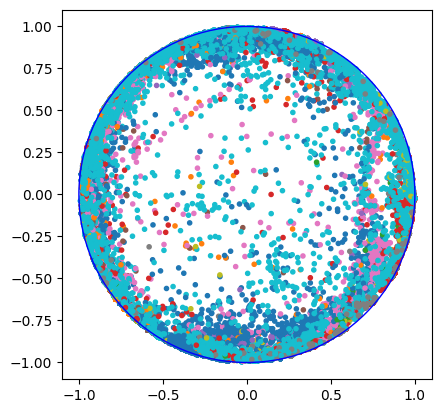

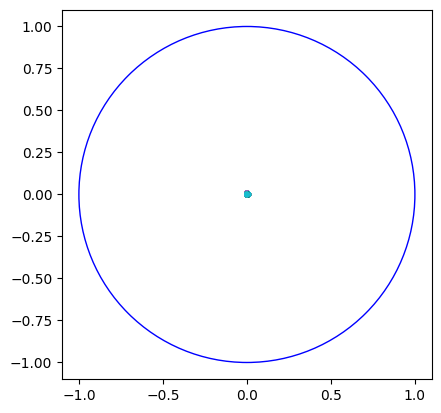

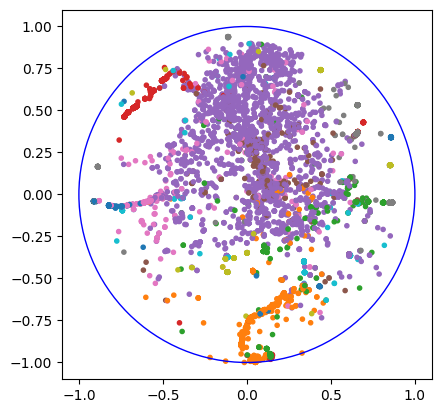

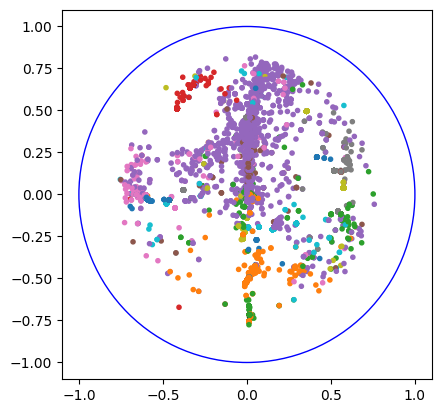

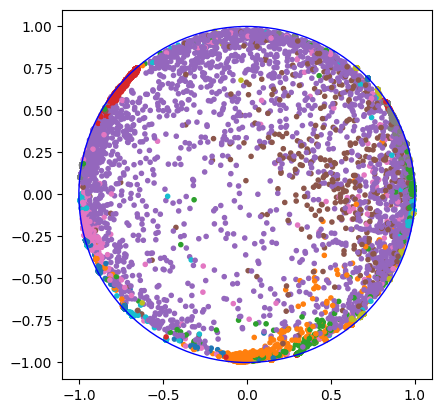

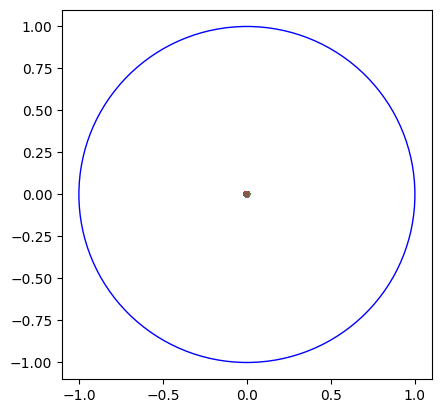

In [5]:
""" 
Code for WordNet Dataset experiments
"""
for dataset in datasets:
    for correct_gradient in correct_gradients:
        for lr in learning_rates_factors:
            for np in num_points:
                for perplexity in perplexities:
                    ##################
                    # INITIALIZATION #
                    ##################
                    print("\nExperiment: ", dataset, "num_points: ", np, "perp: ", perplexity, "correct gradient: ", correct_gradient)

                    # Load the data
                    # NOTE: if we don't use -1 data, we need another argument _ to catch the sample indices
                    dataX, dataLabels, D, V, *rest = load_data(
                        dataset, 
                        data_home=data_home, 
                        pca_components=pca_components,
                        random_state=seed, 
                        to_return="X_labels_D_V",
                        hd_params={"perplexity": perplexity}, 
                        sample=np, 
                        knn_method="hnswlib"  # we use an approximation of high-dimensional neighbors to speed up computations
                    )
                    
                    # Compute initial embedding in Poincare disk (PCA embedding)
                    X_embedded = initialization(
                        n_samples=dataX.shape[0], 
                        n_components=2,
                        X=dataX,
                        random_state=seed,
                        method="pca"
                    ) 

                    # Initialize config and parameters
                    learning_rate = (dataX.shape[0] * 1) / (exaggeration_factor * lr)

                    opt_conf = opt_config(cf, learning_rate, exaggeration_factor, ex_iterations, main_iterations, exact, correct_gradient)
                    opt_params = SequentialOptimizer.sequence_poincare(**opt_conf) 
                    opt_params, opt_conf = initialize_logger(opt_params, opt_conf, log_path=log_path, grad_path=None)

                    # TODO: In the case of CoSNE, we must pass additional parameters to the cost function
                    # x_norm = (X_embedded * X_embedded).sum(axis=1)
                    # opt_params["cf_params"].update(CoSNE_params(x_norm, lambda_1, lambda_2, dataX.shape[0]))  # Add CoSNE params to cf_params dict
                    # print(x_norm.shape, dataX.shape[0], X_embedded.shape)
                    opt_params["cf_params"].update({"grad_fix" : correct_gradient})     # So the cost function knows which gradient to use
                    print(opt_params["cf_params"])

                    #########################
                    # EMBEDDING COMPUTATION #
                    #########################
                    # Set up H-TSNE object 
                    htsne = HyperbolicTSNE(
                        init=X_embedded, 
                        n_components=2, 
                        metric="precomputed", 
                        verbose=True, 
                        opt_method=SequentialOptimizer,         # the optimizater we use
                        opt_params=opt_params              # the parameters for the optimizers
                    )

                    # Compute embedding:
                    try:
                        hyperbolicEmbedding = htsne.fit_transform((D, V))
                        
                    except ValueError:
                        hyperbolicEmbedding = find_last_embedding(log_path)
                        traceback.print_exc()


                    ###################
                    # STORING RESULTS #
                    ###################
                    # Write results to csv
                    data_row = [
                        dataset, np, dataX.shape[1], pca_components,
                        perplexity, pca_components, htsne.cf, cf.class_str(), htsne.runtime, htsne.its,
                        opt_conf['exact'], correct_gradient, grad_scale_fix, lr
                    ]
                
                    results_path = f"results/csvs/{dataset.name}.csv"       # Path of csv file to store results
                    save_folder = f"results/{dataset.name}"                 # Path of folder to store visualizations
                    
                    # Name of visualization file (.png and .gif)
                    file_name = f"{save_folder}/exact:{exact}_correctgrad:{correct_gradient}_scalefix:{grad_scale_fix}_points:{np}_pca:{pca_components}_perp:{perplexity}_cf:{cf.class_str()}_lrfactor:{lr}"

                    # Store results
                    write_data(data_header, data_row, file_path=results_path)
                    store_visuals(hyperbolicEmbedding, dataLabels, save_folder, file_name, opt_params)
                    

""" 
Dimensions for wordnet data
x_norm: (41058,) dataX.shape[0]: 41058 X_embedded: (41058, 2)
grad1.shape: (82116,) Y.shape: (82116,) x_norm: (41058,)
"""